## Библиотечки

In [ ]:
import pandas as pd 
import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 

## EDA

анализ общей не агр таблицы розницы

In [148]:
sale_df = pd.read_csv('Розница доп данные.csv')
#sale_df.profile_report(minimal=True)
#sale_df.head(10)

###  Торговые точки

Много разных магазинов 

инн владельцев карточек 25% уникальных

Есть регион, город, номер магазина и почтовый индекс

Можно распрарсить почтовый индекс = координаты

и выкинуть город и тп


In [6]:
sale_points = pd.read_csv('Справочник Торговые точки .csv')
#sale_points.profile_report()
#sale_points.head(5)

ERROR! Session/line number was not unique in database. History logging moved to new session 162


зкменим float почтовые индексы на инт

In [7]:

sale_points['postal_code'].dtypes
sale_points = sale_points.astype({"postal_code":"Int64"})
sale_points.head(5)

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
0,C72AC534DBF5E6369840FFE9DA9FF403,0056F9FCFA009E493BEFEAE4FAA71D82,51,NaN,NaN,184421
1,591942644AE25AE4DD26CF943BB97414,81AAC456284F455FC2B141E6E8F1A76C,66,г Екатеринбург,2763c110-cb8b-416a-9dac-ad28a55b4402,620027
2,A6E2261F16F84FF09E2B615EDB008943,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390026
3,DC3B647A089FA064DE61E0C778F5EE45,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390017
4,D2F125BAA947B6293CD055DA1DEEA87D,87C2FDB73C26C96266A0947C2BB714BF,62,г Рыбное,91d71d8c-2f1a-43c8-bc84-d78dc4245a1b,391112


#### найдем долготу и широту каждого почтового индекса

In [8]:
import geocoder
import numpy as np
from tqdm import tqdm


# Вбиваешь почтовый индекс - получаешь широту и долготу
def postal_code_to_lat_lng(postal_code):
    if postal_code:
        g = geocoder.osm(postal_code)
        try:
            lat, lng = g.latlng
        except Exception:
            return None
        return (lat, lng)
    else: return postal_code

# Расстояние между координатами
def haversine(lat1, lng1, lat2, lng2):
    r = 6371
    phi1, lam1, phi2, lam2 = map(np.radians, (lat1, lng1, lat2, lng2))
    first_part = np.sin((phi2 - phi1) / 2) ** 2
    second_part = np.cos(phi1) * np.cos(phi2) * np.sin((lam2 - lam1) / 2) ** 2
    return 2 * r * np.arcsin(np.sqrt(first_part + second_part))

In [9]:
sale_points['sale_coord'] = pd.Series([postal_code_to_lat_lng(i) for i in tqdm(sale_points['postal_code'])]) 

  0%|                                                                              | 7/58401 [00:03<8:00:48,  2.02it/s]
KeyboardInterrupt



### Оборот

In [10]:
members_of_oborot = pd.read_csv("Справочник участников оборота товаров.csv")
#members_of_oborot.profile_report()

##### осоо нечего подчеркнуть

### Продукция



In [11]:
production_info = pd.read_csv("Справочник продукции.csv")
#production_info.profile_report()

Продукция

глобальный номер товара

инн владельца 1% уникальных

почти все имена товара уникальные 75%

вид товаров немного 0,1%

3% уникальных брендов

44 страны просихождения

и вес продукта

#### Объединить таблицы 


In [ ]:
# это неверное, тк без ключей объединения 

# доавил вид, вес, бренд, старну, товара в таблицу розницы

#sale_df['product_short_name'] = production_info['product_short_name']
#sale_df['country'] = production_info['country']
#sale_df['weight'] = production_info['volume']
#sale_df['brand'] = production_info['brand']
#sale_df['city_shop'] = sale_points['city_with_type']
#sale_df['region'] = sale_points['region_code']



#### подберем ключи для объединения таблиц

In [12]:
sale_df.columns

Index(['dt', 'gtin', 'prid', 'inn', 'id_sp_', 'type_operation', 'price',
       'cnt'],
      dtype='object')

In [13]:
sale_points.columns

Index(['id_sp_', 'inn', 'region_code', 'city_with_type', 'city_fias_id',
       'postal_code'],
      dtype='object')

#### проверим гипотезу, о том какой процент совпадений по gtin

In [14]:
k = 0
t = 0
hyi = set(production_info["gtin"])
for i in sale_df["gtin"]:
    if i in hyi:
        k += 1
    else:
        t += 1
print(k / (k + t))

1.0


#### непосредственная конкатенация

In [ ]:

#result = pd.concat([sale_df, sale_points[['id_sp_','city_with_type', 'region_code']]], keys='id_sp_')



In [ ]:
#result = pd.concat([sale_df, production_info[['gtin','country', 'product_short_name', 'volume', 'brand']]], keys='gtin')


In [ ]:
result.head(10)

In [149]:
#result = pd.m([sale_df, production_info[['gtin','country', 'product_short_name', 'volume', 'brand']]], keys='gtin')


sale_df = sale_df.join([production_info[['country', 'product_short_name', 'volume', 'brand']]])
sale_df = sale_df.join([sale_points[['city_with_type', 'region_code']]])

In [75]:
sale_df

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt,country,product_short_name,volume,brand,city_with_type,region_code
0,2022-04-02,0E6D952FEFCA3542FF2E4EB72E544D6E,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,85500,1,NaN,9199AB529CF62D4BDB7E8B1D7459001D,10,D2D1641B196DA5477D40C0907FD5F1DA,NaN,51.0
1,2022-04-02,18AA2603B271C19A581133BD34319311,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,83571,1,NaN,9199AB529CF62D4BDB7E8B1D7459001D,НЕ КЛАССИФИЦИРОВАНО,670017E2D871B8962E5456CA71F6A1D1,г Екатеринбург,66.0
2,2022-04-02,807F8E2BBA75FA9FDD7E48689C17B03C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,14285,2,NaN,9199AB529CF62D4BDB7E8B1D7459001D,100,ABB51261177B26E23AC2DE0F0508D6AB,г Рязань,62.0
3,2022-04-02,3DA4C09BB1526430F6584E8FA94C5723,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,DB144114FDED5796EC868E55DA982839,Продажа конечному потребителю в точке продаж,48528,1,NaN,B8AF2335E04E7BAD5168D9B39FABAC21,100,EDFFD44E0EC18764685E952553560EEF,г Рязань,62.0
4,2022-04-02,C2A8785275FF723EDD3057CE98FD794E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,60742,1,NaN,9199AB529CF62D4BDB7E8B1D7459001D,50,75AF532015CFA92F71FF54ADEDB9BEA3,г Рыбное,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262890,2022-11-21,14626906CF0B12635AE5B071D784F164,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,C4204F7C9D1E0830BB62616BACF179E0,Продажа конечному потребителю в точке продаж,27128,1,NaN,NaN,NaN,NaN,NaN,NaN
2262891,2022-11-21,3A013AF92C561998A9AD3E9420F09CDB,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,45575FEF45AFB7992796AA41C2C12915,Продажа конечному потребителю в точке продаж,84428,1,NaN,NaN,NaN,NaN,NaN,NaN
2262892,2022-11-21,384BB78EDF7DEF27992607943AB91B9D,91ECAC3DC5225241188E04925B2C97CA,6B8E111AB5B5C556C0AEA292ACA4D88B,F8CA1C671F4ABC7FCF735A7C49AD59AE,Продажа конечному потребителю в точке продаж,107028,1,NaN,NaN,NaN,NaN,NaN,NaN
2262893,2022-11-21,BE101B7B41C85864E680C7426136B738,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,205714,1,NaN,NaN,NaN,NaN,NaN,NaN


#### посмотрим гистограмму распределения товаров

In [23]:
import matplotlib.pyplot as plt

(array([684., 760., 223., 213.,   3.,   1.,   1.,   1.,  16.,   6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

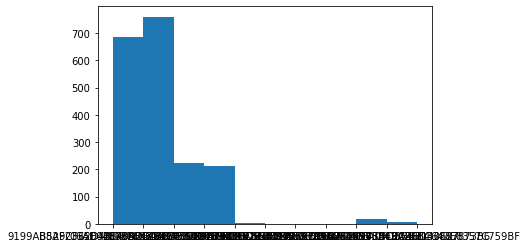

In [25]:
plt.hist(sale_df.dropna()["product_short_name"])

In [29]:
len(sale_df.value_counts("product_short_name"))

137

сохраним основной датасет для обучения модели

In [32]:
sale_df.to_csv('sale_df.csv', index=False)

пронумеруем все уникальные даты для входа в модель

In [76]:
from sklearn.preprocessing import LabelEncoder

def data_in_int(df):    
    le = LabelEncoder().fit(df['dt'])
    df['dt'] = le.transform(df['dt'])
    

колво уникальных дат

In [78]:
len(sale_df.dt.unique())

365

проверка

In [79]:
sale_df.dt.unique

<bound method Series.unique of 0          131
1          131
2          131
3          131
4          131
          ... 
2262890    364
2262891    364
2262892    364
2262893    364
2262894    364
Name: dt, Length: 2262895, dtype: int32>

### Формировка дополтиленьго датасета для модели
Формата:
    каждому товару - цена и спрос по дате (если 0, то цена разница вчера и завтра, колво mean)

In [116]:
sale_df.sort_values(by=['dt'])

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt,country,product_short_name,volume,brand,city_with_type,region_code
7895,0,2C2D3F1352310A924E26F11E384D9784,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,0E155CD38869DC277F68959405FD6CFA,Продажа конечному потребителю в точке продаж,78557,1,NaN,B8AF2335E04E7BAD5168D9B39FABAC21,100,379B8205AF7D51522B5969B8F186A363,г Пермь,59.0
9273,0,B7968C32BFF3AA26447C873654617FC6,668F1CD708BD7C2EF7F7D308637147A7,6B8E111AB5B5C556C0AEA292ACA4D88B,68AFC705887159893F33E537F5EB0D88,Продажа конечному потребителю в точке продаж,85142,1,NaN,9F7293E9B9C4AEC1FEC02CF457F72E93,NaN,E0BB3FD2DEA30ACD6C89416BD2F0F972,г Казань,16.0
9274,0,8F2CAF4CE5B11A1CCB153883A1C9AFE2,7D1B71037D27D5597BEA1D5077663541,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,18585,2,NaN,9F7293E9B9C4AEC1FEC02CF457F72E93,NaN,E0BB3FD2DEA30ACD6C89416BD2F0F972,NaN,18.0
9275,0,7CB922A7FCDF4C3B926909E43CDC1E4E,CE816FDF82B121C67CAE9B79203B8BA1,6B8E111AB5B5C556C0AEA292ACA4D88B,8F2F4EFDAF546C2D6897FAF55F0D107B,Продажа конечному потребителю в точке продаж,24271,1,NaN,9F7293E9B9C4AEC1FEC02CF457F72E93,NaN,E0BB3FD2DEA30ACD6C89416BD2F0F972,NaN,26.0
9276,0,832C2D353A101B78E2916FB6A3A9DA6C,0618FA53229CAA68F16217D747EB5C46,6B8E111AB5B5C556C0AEA292ACA4D88B,1A7D8F22AD08CD78628D80CF4B76040C,Продажа конечному потребителю в точке продаж,37128,1,NaN,9F7293E9B9C4AEC1FEC02CF457F72E93,NaN,E0BB3FD2DEA30ACD6C89416BD2F0F972,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238785,364,A3E2C2BE1A07FC2A237664417710B981,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,AD9DF072A1CE330469FA46DFCF35F9F2,Продажа конечному потребителю в точке продаж,114271,1,NaN,NaN,NaN,NaN,NaN,NaN
2238786,364,D22F309608A34B8C5D487511B4C9082C,A43BE3249A22A8CCB7AE1F6D1B1477D0,6B8E111AB5B5C556C0AEA292ACA4D88B,3998CD031AE705195AAF0A63B52C95EF,Продажа конечному потребителю в точке продаж,125357,1,NaN,NaN,NaN,NaN,NaN,NaN
2238787,364,10D5690F41A0CF35E4C1CA9B747517A3,DE787BD489DD63958A40FE3AF1B45F28,6B8E111AB5B5C556C0AEA292ACA4D88B,1B398061561B35FE8F4865C8AB024075,Прочий тип вывода из оборота,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2238778,364,6BBDFD6187FEED42838ACFC482A48D50,77F82E55113DC87D9DD6E67AC7C3B6A7,6B8E111AB5B5C556C0AEA292ACA4D88B,NaN,Продажа конечному потребителю в точке продаж,204000,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
товар[
        цена[
        [
            price1, price2 - если не крайние -> среднее ; среднее * 10
        ],
        [
            cnt1, cnt2, 
        ]
    ]
]

In [103]:
sale_df[sale_df["gtin"] == "0E6D952FEFCA3542FF2E4EB72E544D6E"]. \
                groupby("dt").agg({'cnt'})


In [105]:
#sale_df.groupby('gtin').agg({'cnt':'size', 'price':['mean']})

,cnt,price
,size,mean
gtin,,
000353B28DA976A5CB2A71139AE83E7B,40,51706.100000
000ED2D0FEEFCB166F2E60DF05368A14,4,284057.000000
001DD284810DEFDD787F4DDFF662EA1F,14,115836.285714
001E37C5AEF7D80112B325441B908ACD,4,109803.250000
002C3D5DDD194A3837BEE8B3857F2C2F,56,197928.821429
...,...,...
FFD98FE9A4F6D9C3FC2C47B73778F9BA,85,74353.494118
FFE2D1758B99E61B60C6678E5CDD3547,98,108073.683673


In [126]:
sale_df = sale_df.sort_values(['gtin', 'dt'])
sale_df['sale_diff'] = sale_df.groupby('gtin')['price'].diff()
grouped_df = sale_df.groupby('dt'). \
agg({
                         'cnt': 'mean',
                         'sale_diff':'sum',
                         'price':'sum'

                        })
grouped_df

,cnt,sale_diff,price
dt,,,
0,1.532037,707923.0,313842175
1,1.570101,-1870905.0,313196472
2,1.596898,-2879056.0,302388912
3,1.623000,-2259888.0,337769068
4,1.868089,498763.0,667491675
...,...,...,...
360,1.133222,-2582190.0,656867264
361,1.137842,727287.0,702903699
362,1.142432,3983431.0,971102421


нужен товар как primary key

In [ ]:
grouped = sale_df.groupby(['gtin', 'dt'])['cnt'].mean()
diff = sale_df.groupby(['gtin', 'dt'])['cnt'].diff()

добавим отбор только для опр типа операции = Продажа конечному потребителю в точке продаж


In [137]:
sale_df = sale_df[sale_df["type_operation"] == "Продажа конечному потребителю в точке продаж"]

In [147]:
data = {}
for i in tqdm(set(sale_df["gtin"])):
    local_df = sale_df[sale_df["gtin"] == i].groupby("dt")
    a, b = local_df.sum(), local_df.mean()
    price = [price for price in local_df['price']]
    cnt = [cnt for cnt in local_df['cnt']]
    #print(a)
    data[i] = [price, cnt]

  1%|▉                                                                              | 102/9089 [00:30<44:36,  3.36it/s]


KeyboardInterrupt: 

In [ ]:
local_df.cnt.unique()

In [142]:
tqdm

tqdm.std.tqdm

In [145]:
len(cnt)

283

#### Итог

In [146]:
a

,price,cnt,region_code
dt,,,
2021-11-22,58557,1,59.0
2021-11-23,117114,2,46.0
2021-11-25,117114,3,0.0
2021-11-26,117114,4,0.0
2021-11-27,175671,5,0.0
...,...,...,...
2022-11-17,416425,6,0.0
2022-11-18,749565,9,0.0
2022-11-19,749565,9,0.0


### в отдельный словрь всю полезную инфу по gtin : в список все остальное

In [151]:
sale_df.columns

Index(['dt', 'gtin', 'prid', 'inn', 'id_sp_', 'type_operation', 'price', 'cnt',
       'country', 'product_short_name', 'volume', 'brand', 'city_with_type',
       'region_code'],
      dtype='object')

Не оптимальное решение

In [193]:
dic = {}
for i in tqdm(sale_df['gtin']):
    arr = []
    dic[i] = [sale_df[sale_df['gtin']==i]['type_operation']]
dic

  0%|                                                                         | 20/2262895 [00:10<331:23:28,  1.90it/s]


KeyboardInterrupt: 

In [176]:
sale_df.columns

Index(['dt', 'gtin', 'prid', 'inn', 'id_sp_', 'type_operation', 'price', 'cnt',
       'country', 'product_short_name', 'volume', 'brand', 'city_with_type',
       'region_code'],
      dtype='object')

In [186]:
dict_by_index = sale_df[['type_operation','product_short_name', 'brand','country','volume', 'city_with_type', 'region_code']].\
to_dict(orient='index')
result_dict = {gtin: dict_by_index[i] for i, gtin in enumerate(sale_df['gtin'])}
result_dict

{'0E6D952FEFCA3542FF2E4EB72E544D6E': {'type_operation': 'Продажа конечному потребителю в точке продаж',
  'product_short_name': nan,
  'brand': nan,
  'country': nan,
  'volume': nan,
  'city_with_type': nan,
  'region_code': nan},
 '18AA2603B271C19A581133BD34319311': {'type_operation': 'Продажа конечному потребителю в точке продаж',
  'product_short_name': nan,
  'brand': nan,
  'country': nan,
  'volume': nan,
  'city_with_type': nan,
  'region_code': nan},
 '807F8E2BBA75FA9FDD7E48689C17B03C': {'type_operation': 'Продажа конечному потребителю в точке продаж',
  'product_short_name': nan,
  'brand': nan,
  'country': nan,
  'volume': nan,
  'city_with_type': nan,
  'region_code': nan},
 '3DA4C09BB1526430F6584E8FA94C5723': {'type_operation': 'Продажа конечному потребителю в точке продаж',
  'product_short_name': nan,
  'brand': nan,
  'country': nan,
  'volume': nan,
  'city_with_type': nan,
  'region_code': nan},
 'C2A8785275FF723EDD3057CE98FD794E': {'type_operation': 'Продажа конечно

#### Проверка

In [187]:
print(len(result_dict))

9269


In [188]:
len(sale_df.gtin.unique())

9269

#### Экспорт

In [189]:
import json

In [190]:
json.dump(result_dict, open("result_dick2.json", "w"))